In [ ]:
import pandas as pd

df = pd.read_csv('vTargetMailCustomer.csv',encoding='latin1')

In [ ]:
df.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,4/8/1966,M,...,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,7/22/2005,1-2 Miles,Pacific,49,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,5/14/1965,S,...,0,1,2243 W St.,NaN,1 (11) 500 555-0110,7/18/2005,0-1 Miles,Pacific,50,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,8/12/1965,M,...,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,7/10/2005,2-5 Miles,Pacific,50,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,2/15/1968,S,...,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,7/1/2005,5-10 Miles,Pacific,47,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,8/8/1968,S,...,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,7/26/2005,1-2 Miles,Pacific,47,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Data preprocessing

In [ ]:
df[df.duplicated()]


,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerKey           18484 non-null  int64 
 1   GeographyKey          18484 non-null  int64 
 2   CustomerAlternateKey  18484 non-null  object
 3   Title                 101 non-null    object
 4   FirstName             18484 non-null  object
 5   MiddleName            10654 non-null  object
 6   LastName              18484 non-null  object
 7   NameStyle             18484 non-null  int64 
 8   BirthDate             18484 non-null  object
 9   MaritalStatus         18484 non-null  object
 10  Suffix                3 non-null      object
 11  Gender                18484 non-null  object
 12  EmailAddress          18484 non-null  object
 13  YearlyIncome          18484 non-null  int64 
 14  TotalChildren         18484 non-null  int64 
 15  NumberChildrenAtHome  18484 non-null

In [ ]:
df.drop(["CustomerKey", "GeographyKey", "CustomerAlternateKey", "NameStyle", "Title", "FirstName", "MiddleName", "LastName", "AddressLine1", "AddressLine2", "Phone", "DateFirstPurchase"], axis=1, inplace=True)

In [ ]:
print(df.isnull().sum())

BirthDate                   0
MaritalStatus               0
Suffix                  18481
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
SpanishEducation            0
FrenchEducation             0
EnglishOccupation           0
SpanishOccupation           0
FrenchOccupation            0
HouseOwnerFlag              0
NumberCarsOwned             0
CommuteDistance             0
Region                      0
Age                         0
BikeBuyer                   0
dtype: int64


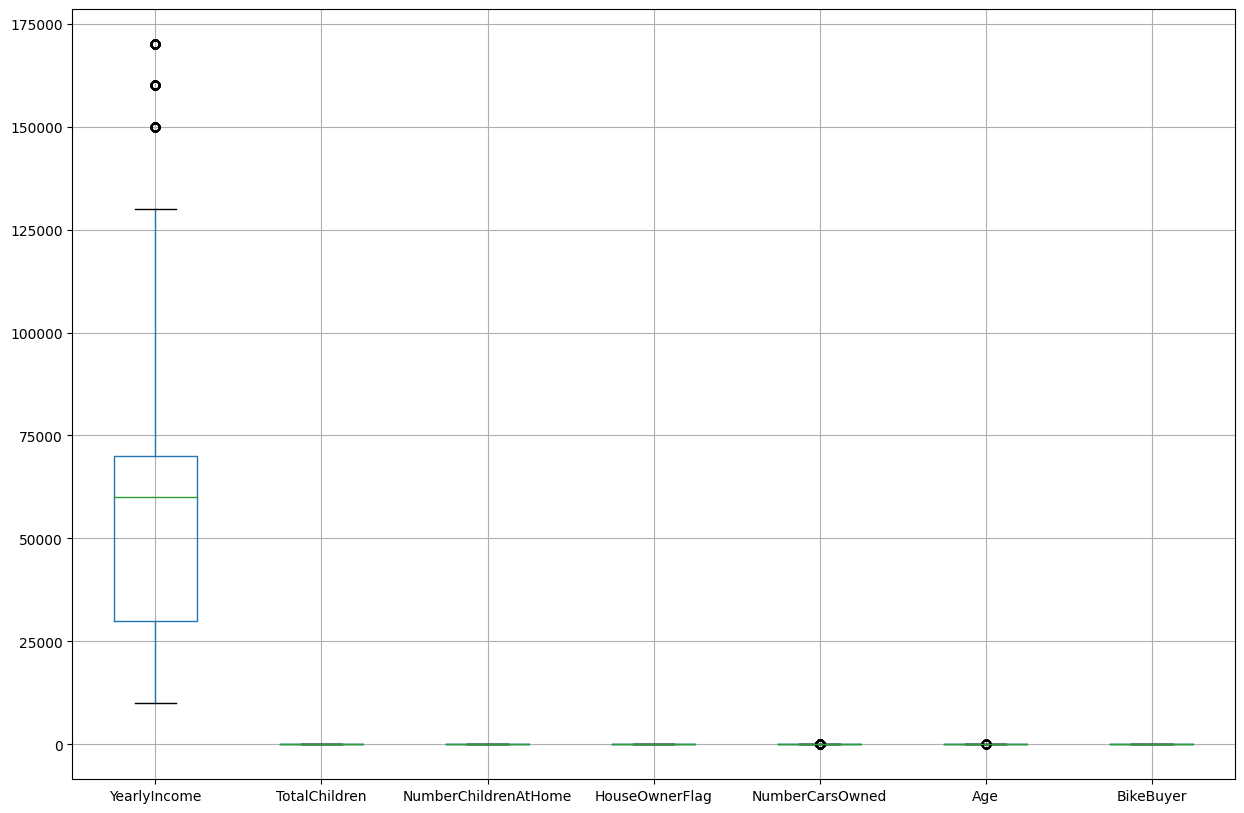

In [ ]:
# a check for outliers
df.boxplot(figsize=(15, 10))
plt.show()

In [ ]:
# we use  log transformation to reduce the skewness of the features
df["YearlyIncome"] = np.log1p(df["YearlyIncome"])
df["NumberCarsOwned"] = np.log1p(df["NumberCarsOwned"])
df["NumberChildrenAtHome"] = np.log1p(df["NumberChildrenAtHome"])
df["TotalChildren"] = np.log1p(df["TotalChildren"])


In [ ]:
# scaling  data
# here we use   the standard scaler to make the features comparable and reduce the effect of large values on the distance metric
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(["BikeBuyer", "BirthDate", "MaritalStatus", "Suffix", "Gender", "EmailAddress", "EnglishEducation", "SpanishEducation", "FrenchEducation", "EnglishOccupation", "SpanishOccupation", "FrenchOccupation", "HouseOwnerFlag", "CommuteDistance", "Region"], axis=1))


In [ ]:
# encoding  categorical features
# Here we use the  label encoder to convert categorical features into numerical values
encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded["MaritalStatus"] = encoder.fit_transform(df["MaritalStatus"])
df_encoded["Suffix"] = encoder.fit_transform(df["Suffix"])
df_encoded["Gender"] = encoder.fit_transform(df["Gender"])
df_encoded["EnglishEducation"] = encoder.fit_transform(df["EnglishEducation"])
df_encoded["SpanishEducation"] = encoder.fit_transform(df["SpanishEducation"])
df_encoded["FrenchEducation"] = encoder.fit_transform(df["FrenchEducation"])
df_encoded["EnglishOccupation"] = encoder.fit_transform(df["EnglishOccupation"])
df_encoded["SpanishOccupation"] = encoder.fit_transform(df["SpanishOccupation"])
df_encoded["FrenchOccupation"] = encoder.fit_transform(df["FrenchOccupation"])
df_encoded["HouseOwnerFlag"] = encoder.fit_transform(df["HouseOwnerFlag"])
df_encoded["CommuteDistance"] = encoder.fit_transform(df["CommuteDistance"])
df_encoded["Region"] = encoder.fit_transform(df["Region"])

In [ ]:

# concatenate the scaled and encoded features
df_preprocessed = pd.concat([pd.DataFrame(df_scaled, columns=["YearlyIncome", "TotalChildren", "NumberChildrenAtHome", "NumberCarsOwned", "Age"]), df_encoded[["BikeBuyer", "MaritalStatus", "Suffix", "Gender", "EnglishEducation", "SpanishEducation", "FrenchEducation", "EnglishOccupation", "SpanishOccupation", "FrenchOccupation", "HouseOwnerFlag", "CommuteDistance", "Region"]]], axis=1)

In [ ]:
df_preprocessed.to_csv('preprocessed_data.csv', index=False)

In [ ]:
# reducing the  dimensionality
# Here we PCA to project the data into two dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed)
pd.DataFrame(df_pca, columns=['PCA1', 'PCA2']).to_csv('df_pca.csv', index=False)


# Clustering algorithms

# KMeans

In [ ]:
df_preprocessed = pd.read_csv("preprocessed_data.csv")
df_pca = pd.read_csv("df_pca.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

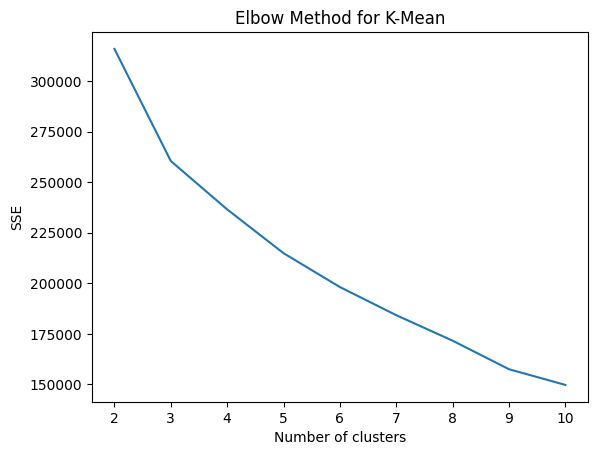

In [ ]:
# We use elbow method to find optimal k
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_preprocessed)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for K-Mean")
plt.show()

In [ ]:
# First we are choosing  k=4 as the elbow point
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_preprocessed)
labels_kmeans = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# use silhouette score
score_kmeans = silhouette_score(df_preprocessed, labels_kmeans)
print("Silhouette score for K-Mean: ", score_kmeans)

Silhouette score for K-Mean:  0.22061128866247406


In [ ]:
df_pca = df_pca.values

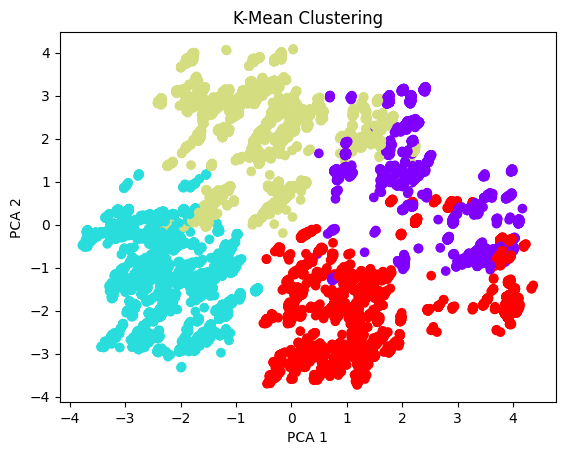

In [ ]:

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans, cmap="rainbow")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Mean Clustering")
plt.show()

DBSCAN

In [ ]:
# use trial and error to find optimal eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_preprocessed)
labels_dbscan = dbscan.labels_




Evaluation


In [ ]:

score_dbscan = silhouette_score(df_preprocessed, labels_dbscan)
print("Silhouette score for DBSCAN: ", score_dbscan)

Silhouette score for DBSCAN:  0.25767006981047463


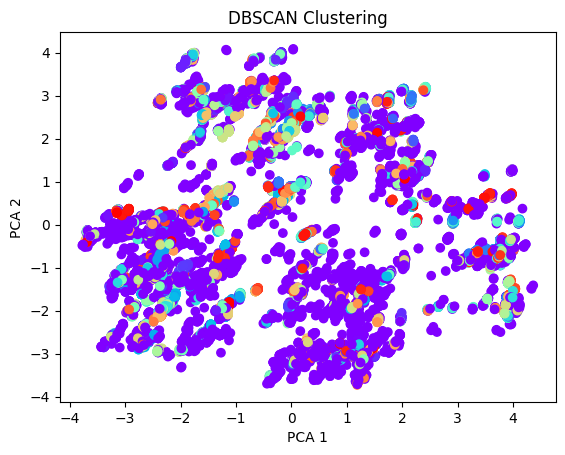

In [ ]:

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_dbscan, cmap="rainbow")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering")
plt.show()